<a href="https://colab.research.google.com/github/uzeziogho/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import average_precision_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

creditcardpd= pd.read_csv('/content/creditcard.csv')


In [5]:
creditcardpd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [6]:
creditcardpd.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,...,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235720.000000,235719.000000,235719.000000
mean,81309.421008,-0.058486,-0.017399,0.149906,0.038300,-0.053472,0.025844,-0.021503,0.002476,0.001644,...,-0.004719,-0.018303,-0.008836,0.000402,0.031761,0.002508,-0.000098,0.001555,91.179565,0.001824
std,40709.367130,1.957911,1.672539,1.501113,1.414335,1.378130,1.325123,1.232341,1.207137,1.119964,...,0.743732,0.712201,0.644912,0.606417,0.511683,0.486578,0.402527,0.334106,252.704617,0.042672
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,48610.750000,-0.945630,-0.605074,-0.628975,-0.829401,-0.740668,-0.738619,-0.566690,-0.198012,-0.659955,...,-0.225516,-0.533562,-0.166413,-0.349795,-0.279921,-0.330885,-0.070136,-0.049010,6.000000,0.000000
50%,74843.500000,-0.023072,0.064796,0.339358,0.031589,-0.111353,-0.242993,0.014608,0.031585,-0.064535,...,-0.033306,-0.007749,-0.021195,0.046468,0.066876,-0.059482,0.002990,0.015205,23.480000,0.000000
75%,122913.000000,1.250141,0.781110,1.133986,0.823188,0.546006,0.429411,0.539483,0.331532,0.610269,...,0.171810,0.481557,0.130140,0.428842,0.370103,0.251306,0.089183,0.078056,79.990000,0.000000
max,148513.000000,2.454930,22.057729,9.382558,16.875344,34.801666,22.529298,36.877368,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


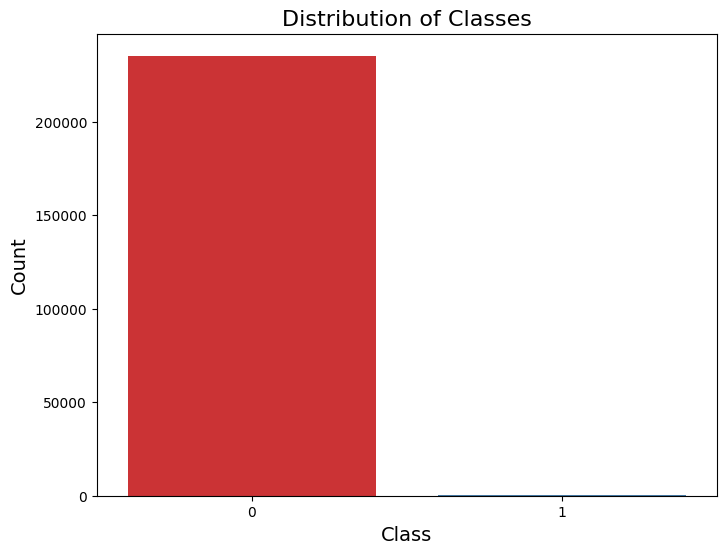

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the 'Class' column

# Count the occurrences of each class
class_counts = df['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set1')

# Add labels and a title
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Classes', fontsize=16)

# Show the plot
plt.show()


In [13]:
creditcardpd['Class'].unique()

array([ 0.,  1., nan])

In [14]:
df = pd.DataFrame(creditcardpd)

# Fill missing values with a specific value, e.g., 0, and then convert to int
df['Class'] = df['Class'].fillna(0).astype(int)

In [18]:
# Calculate the mean of the 'Class' column, excluding NaN values
mean_value = df['Amount'].mean()

# Fill NaN values with the mean value and then convert the column to int
df['Amount'] = df['Amount'].fillna(mean_value)

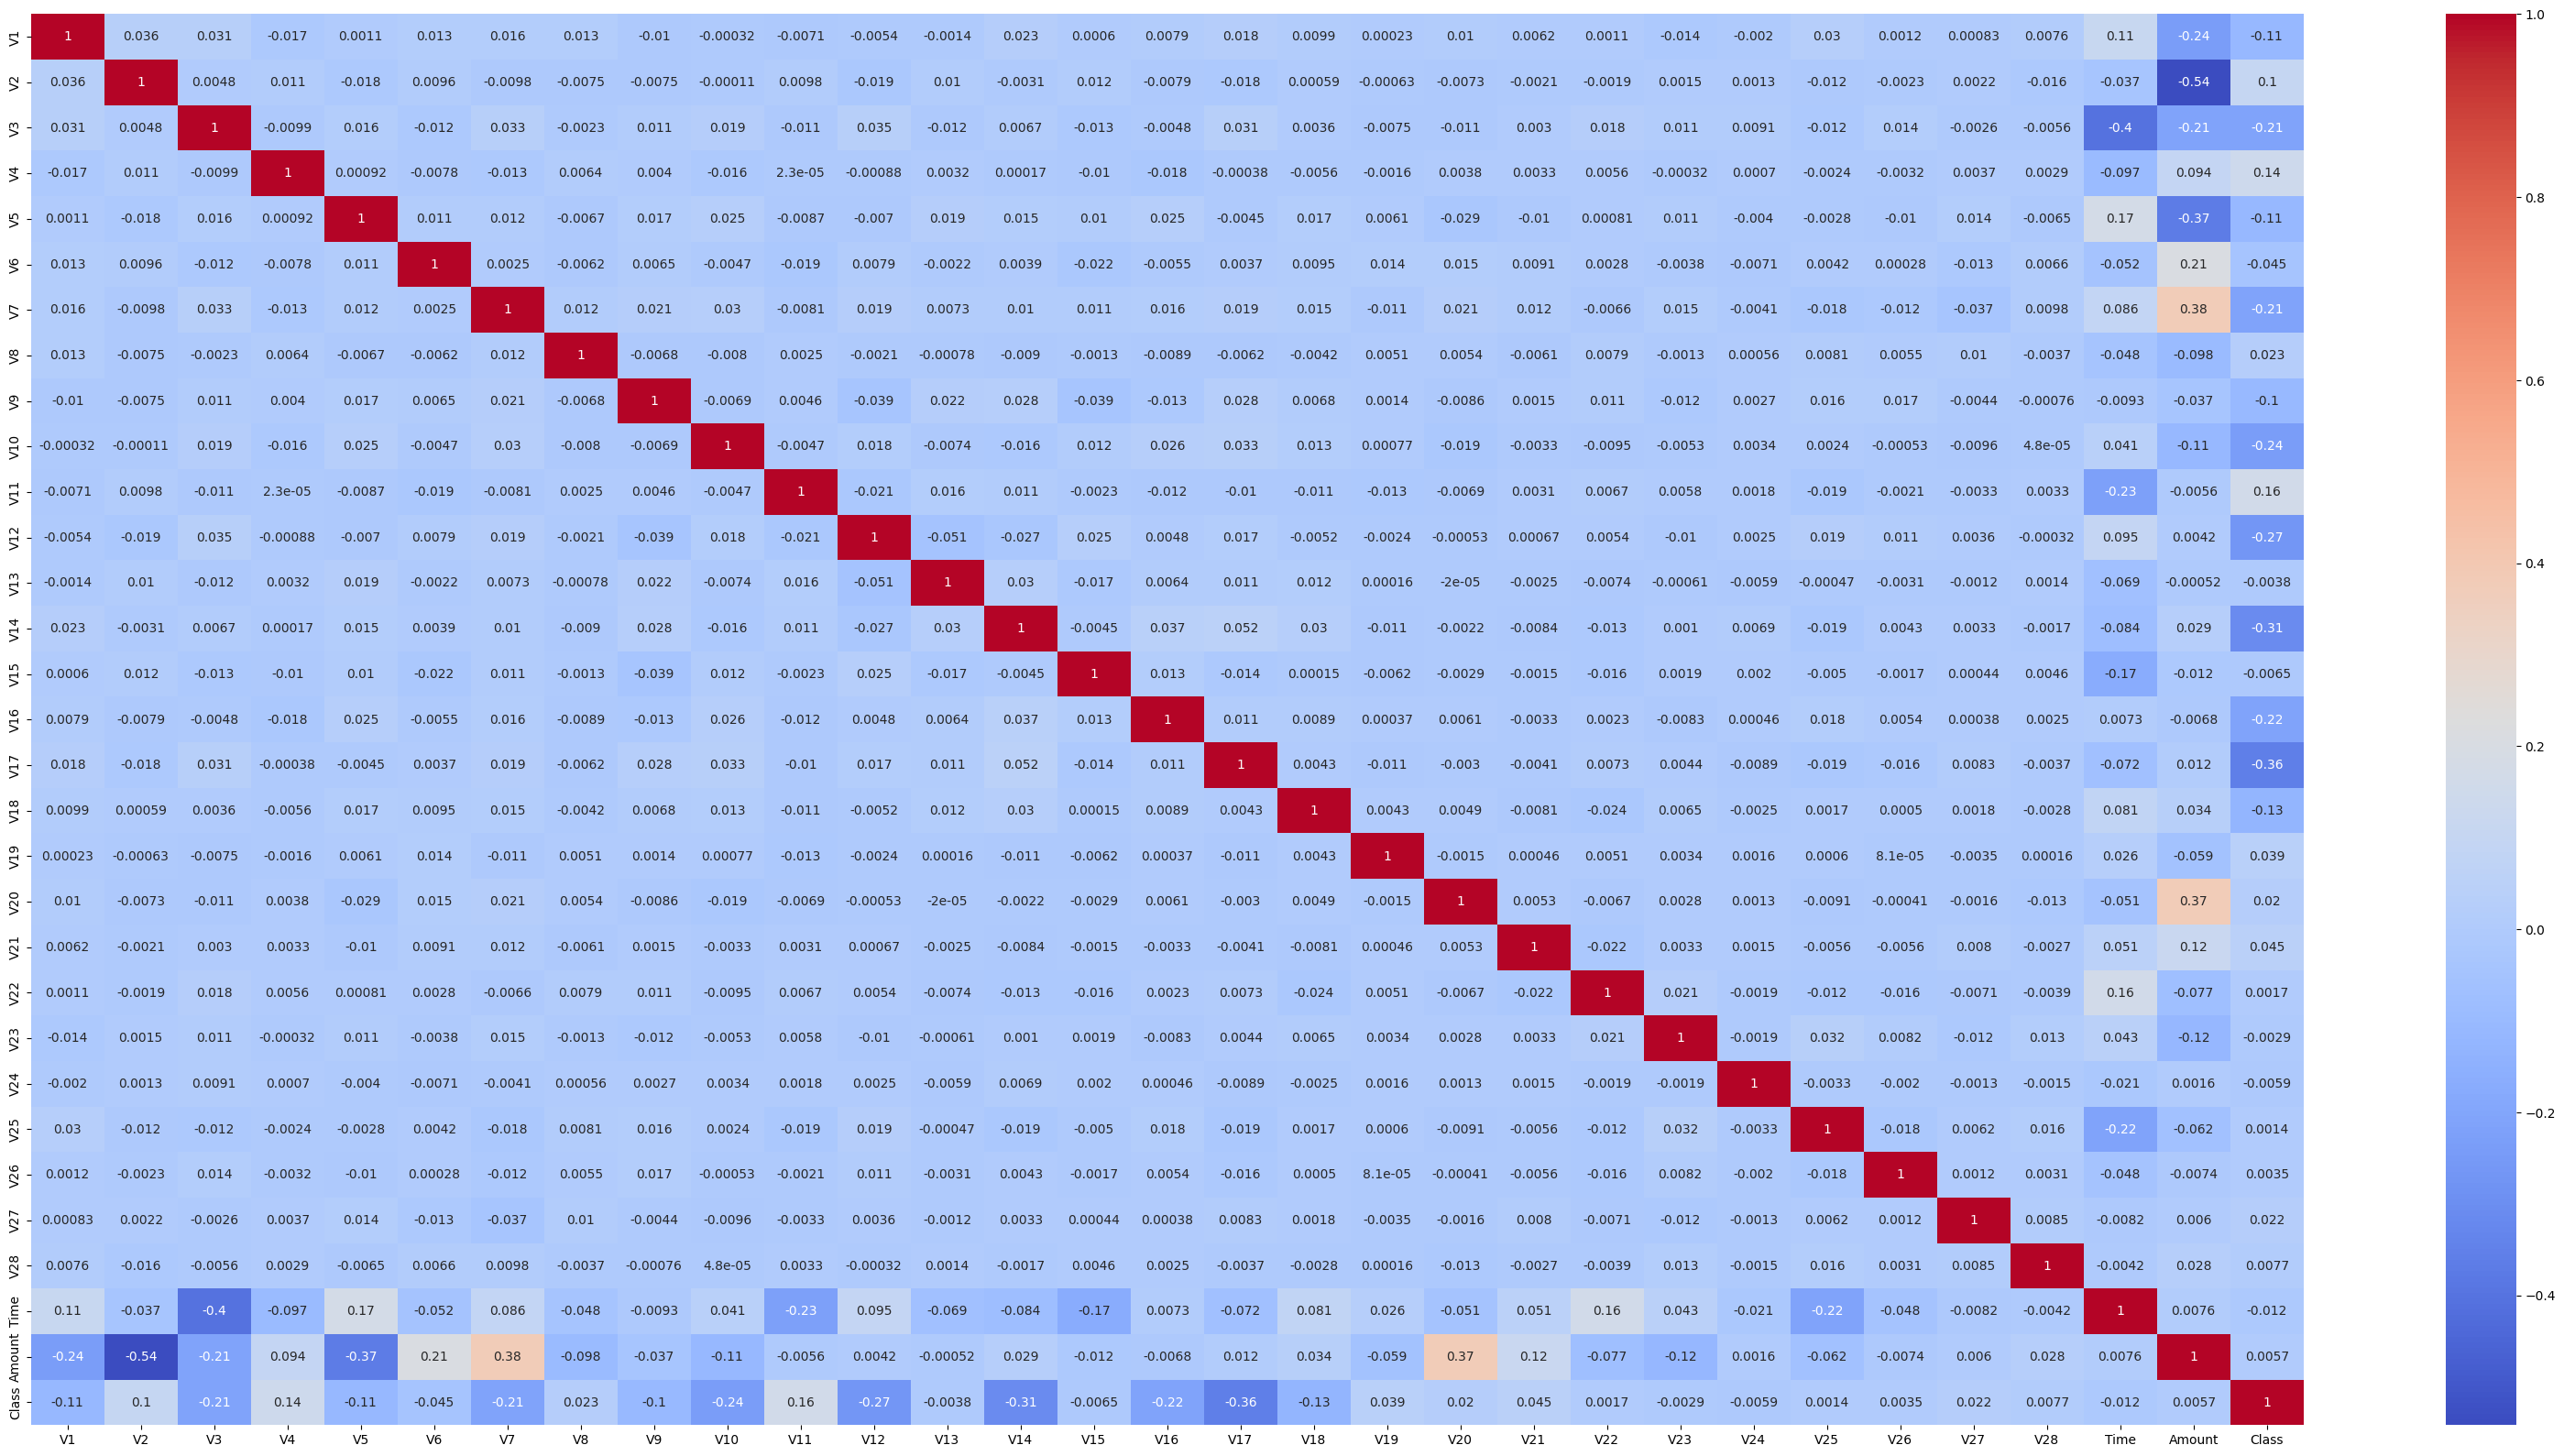

In [30]:
# Select the 31 features for analysis
features = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13',
            'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Time','Amount','Class']

# calculate the correlation matrix
corr_matrix = df[features].corr(method='pearson')

# plot the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(40, 20)) # set the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax) # plot the heatmap
plt.show() # show the plot

In [34]:
columns_to_fillna = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13',
            'V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Time','Amount','Class']  # Replace with your column names

for column in columns_to_fillna:
    mean_value = creditcardpd[column].mean()
    creditcardpd[column].fillna(mean_value, inplace=True)

In [39]:
creditcardpd['Class'] = np.where(creditcardpd['Class'] == 1, 1, 0)

In [41]:
# Define features and target variable
X = creditcardpd.drop('Class', axis=1)
y = creditcardpd['Class']

In [42]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling to balance the class distribution
smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_resample(X, y)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=0)

In [43]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)

# Scale your input features
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

In [54]:
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [55]:
# Evaluate the model
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate precision-recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
area_under_prc = auc(recall, precision)

print("Area Under Precision-Recall Curve (AUPRC):", area_under_prc)

Confusion Matrix:
[[46809   408]
 [ 1380 45519]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     47217
           1       0.99      0.97      0.98     46899

    accuracy                           0.98     94116
   macro avg       0.98      0.98      0.98     94116
weighted avg       0.98      0.98      0.98     94116

Area Under Precision-Recall Curve (AUPRC): 0.9978794397878812


Area Under Precision-Recall Curve (AUPRC): 0.9978794397878812


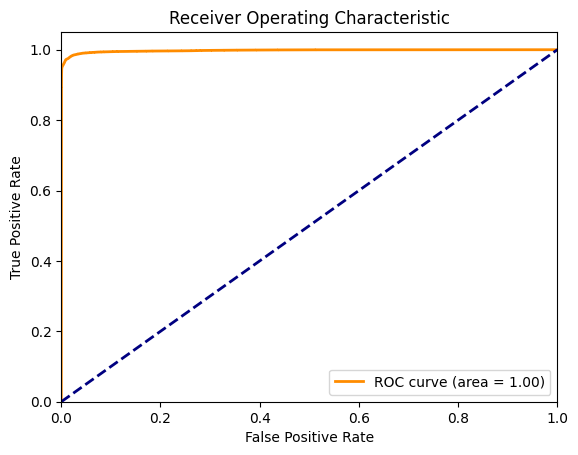

In [56]:
# Calculate precision-recall curve and AUPRC
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
area_under_prc = auc(recall, precision)

print("Area Under Precision-Recall Curve (AUPRC):", area_under_prc)

# Plot ROC curve (Receiver Operating Characteristic)
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()